__Multi-Class Prediction of Obesity Risk__
- 출처 : https://www.kaggle.com/competitions/playground-series-s4e2/overview (사용 데이터)
- 참고 : https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster (원본 데이터)

[개요]
- 다양한 요인을 활용해 비만 위험(obesity risk) 예측

[Columns] : 18 columns
- id
- Gender
- Age
- Height
- Weight
- family_history_with_overweight : family member suffered or suffers from overweight
- FAVC : Frequent consumption of high caloric food
- FCVC : Frequency of consumption of vegetables
- NCP : Number of main meals
- CAEC : Consumption of food between meals
- SMOKE : Smoker or not
- CH2O : Consumption of water daily
- SCC : Calories consumption monitoring
- FAF : Physical activity frequency
- TUE : Time using technology devices
- CALC : Consumption of alcohol
- MTRANS : Transportation used
- __NObeyesdad__ (target) : Obesity level deducted


[Evaluation]
- accuracy score

[Submission]
- id, NObeyesdad

# Data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("./data/Obesity Risk/train.csv")
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [4]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
train.describe(include="object")

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


- 결측치 없음
- 크게 전처리 할 사항 없어 보임

In [7]:
# target
train["NObeyesdad"].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

# EDA

In [8]:
df = train.copy()

In [9]:
# 수치형, 범주형 변수명 저장
num_list = list(df.select_dtypes("number").columns) # ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
cat_list = list(df.select_dtypes("object").columns) # ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 
                                                    #  'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

## 시각화: 수치형

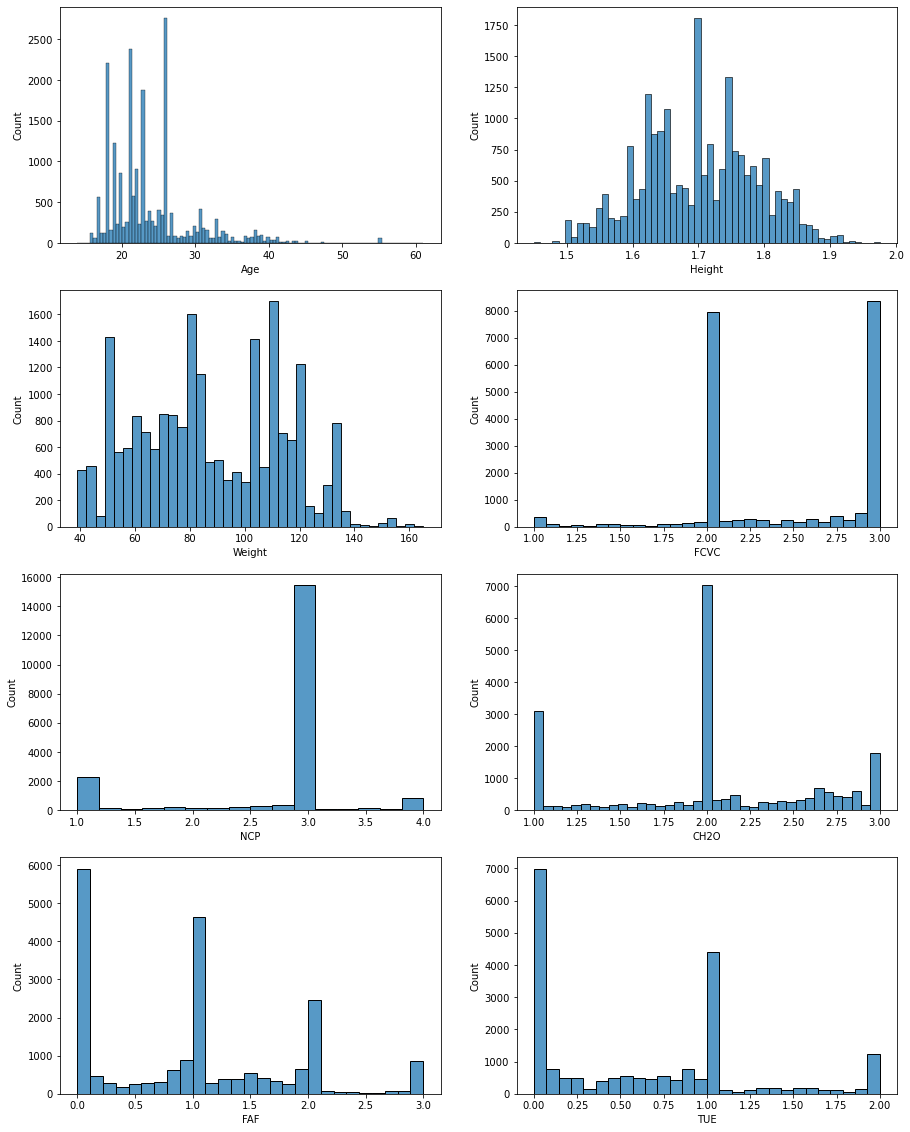

In [10]:
# 수치형 변수
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, col_name in enumerate(num_list[1:]):
    sns.histplot(data=df[col_name], ax=axes[i//2, i%2])

## 시각화: 범주형

In [11]:
# target 변수 : 순서 부여하기 -- categorical data로 변환
# 참고 : https://suy379.tistory.com/150

from pandas.api.types import CategoricalDtype

target_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
ordered_NObe = CategoricalDtype(categories=target_order, ordered=True)

df["NObeyesdad"] = df["NObeyesdad"].astype(ordered_NObe)
df["NObeyesdad"].unique()

['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I']
Categories (7, object): ['Insufficient_Weight' < 'Normal_Weight' < 'Overweight_Level_I' < 'Overweight_Level_II' < 'Obesity_Type_I' < 'Obesity_Type_II' < 'Obesity_Type_III']

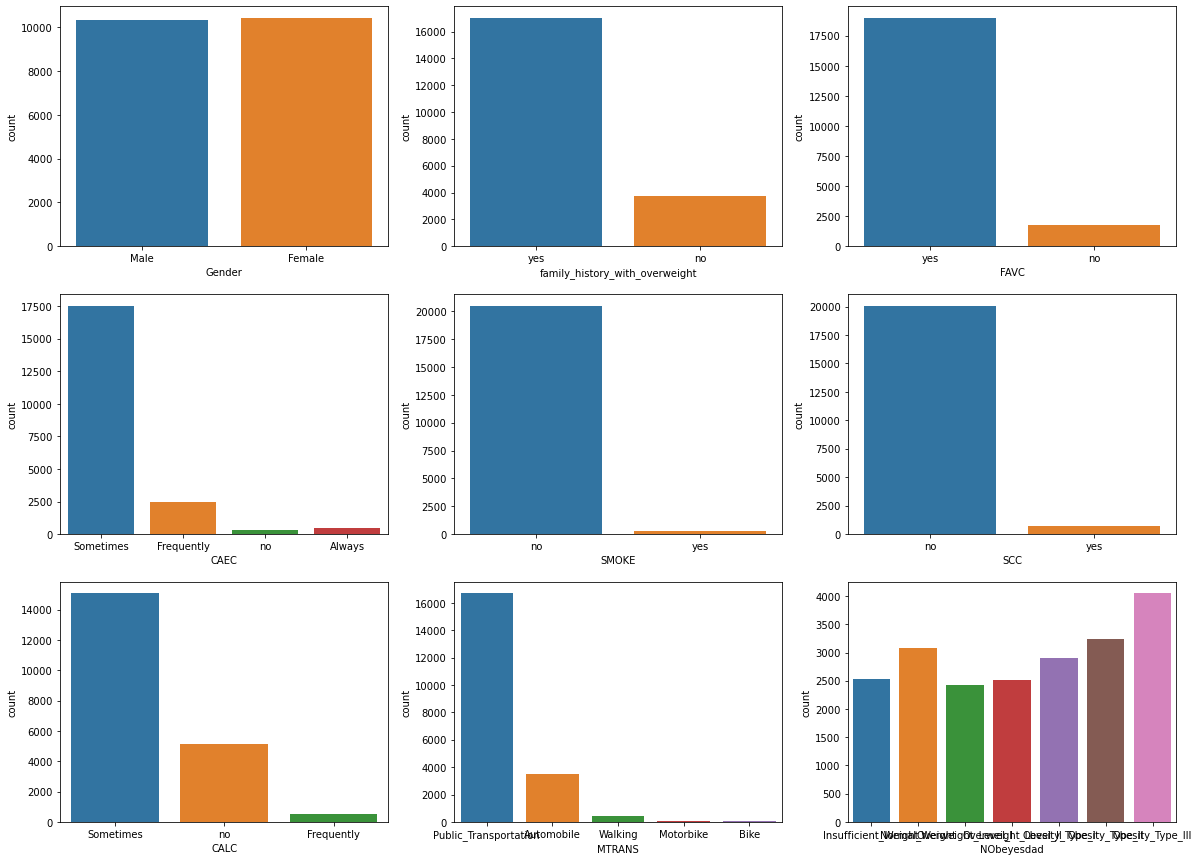

In [12]:
# 범주형 변수
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

for i, col_name in enumerate(cat_list):
    sns.countplot(data=df, x=col_name, ax=axes[i//3, i%3])

## target feature

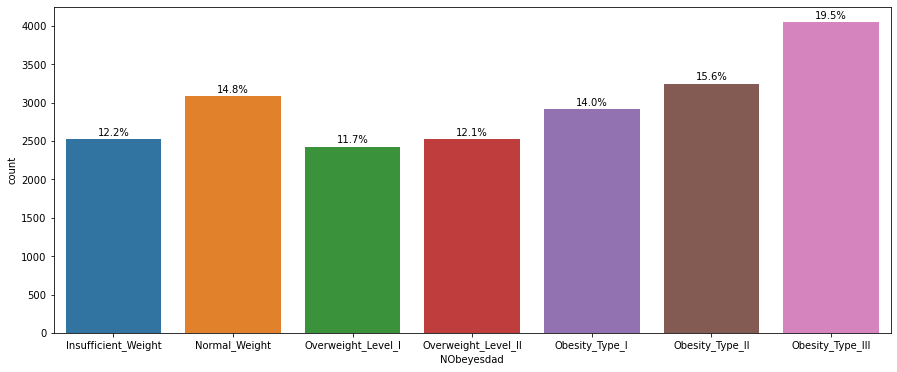

In [13]:
# target 변수 EDA

plt.figure(figsize=(15,6))
p = sns.countplot(data=df, x="NObeyesdad")

for patch in p.patches:
        p.annotate(format(patch.get_height() / df.shape[0] * 100, '.1f')+"%",
                   (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 7),
                   textcoords = 'offset points')

In [14]:
df["NObeyesdad"].value_counts(normalize=True) * 100

Obesity_Type_III       19.491280
Obesity_Type_II        15.646979
Normal_Weight          14.847288
Obesity_Type_I         14.018692
Insufficient_Weight    12.154350
Overweight_Level_II    12.149533
Overweight_Level_I     11.691878
Name: NObeyesdad, dtype: float64

## bmi

In [24]:
# 파생변수 생성 : bmi

df["bmi"] = df["Weight"]/(df["Height"]*df["Height"])
df[["Weight","Height","bmi"]].head()

,Weight,Height,bmi
0,81.669950,1.699998,28.259565
1,57.000000,1.560000,23.422091
2,50.165754,1.711460,17.126706
3,131.274851,1.710730,44.855798
4,93.798055,1.914186,25.599151


<AxesSubplot:xlabel='NObeyesdad', ylabel='bmi'>

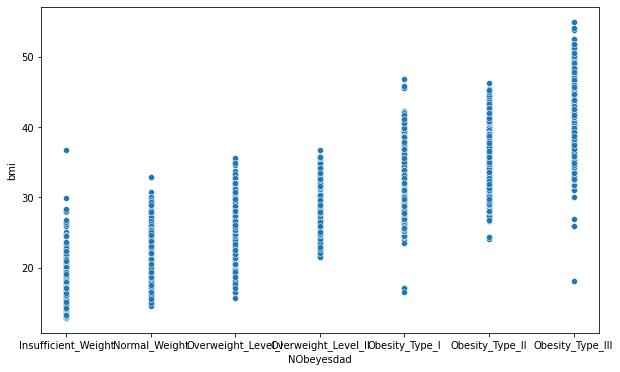

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="NObeyesdad", y="bmi")

<AxesSubplot:xlabel='NObeyesdad', ylabel='bmi'>

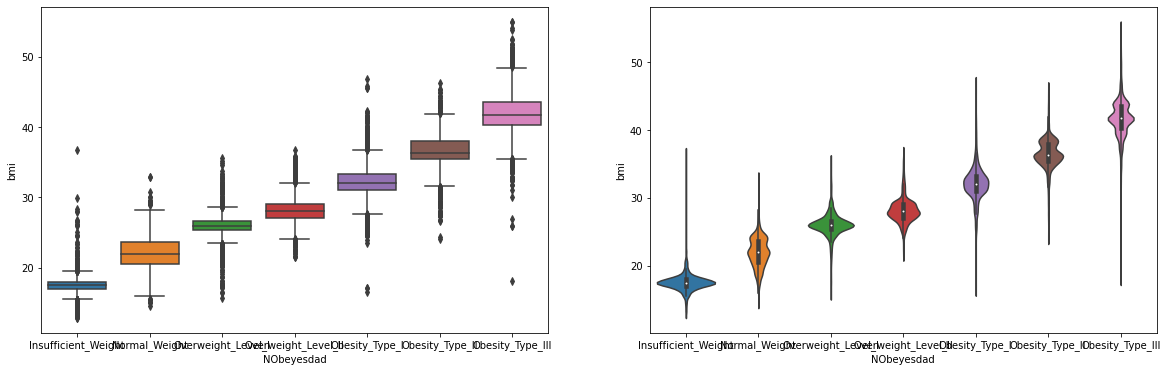

In [159]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))

sns.boxplot(data=df, x="NObeyesdad", y="bmi", ax=axes[0])
sns.violinplot(data=df, x="NObeyesdad", y="bmi", ax=axes[1])

In [101]:
# bmi_class를 위한 범위 리스트
bins = [0, 18.5, 25, 30, 35, 40, 60]  # max = 54.99

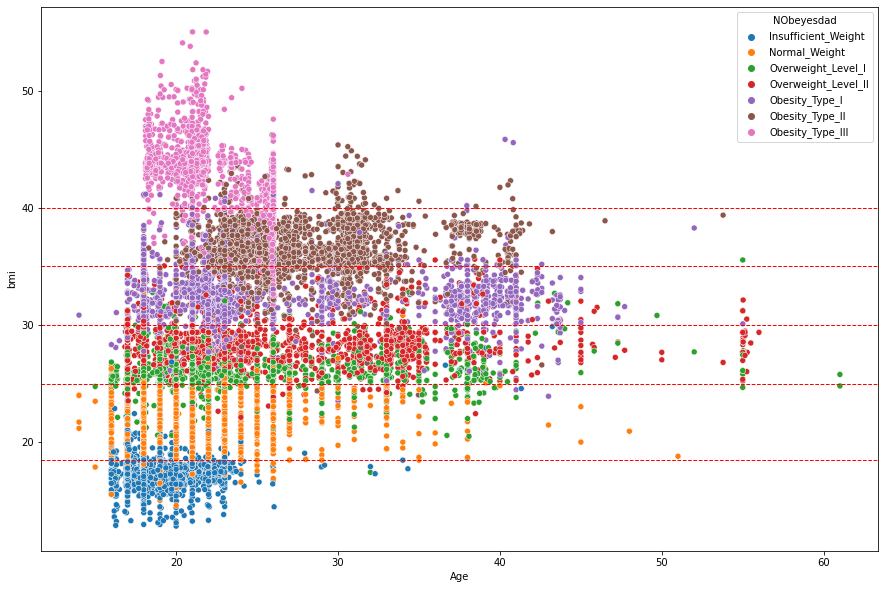

In [97]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="Age", y="bmi", hue="NObeyesdad")

for bin in bins[1:-1]:
    plt.axhline(y=bin, color = 'red', linestyle ='--', linewidth=1)

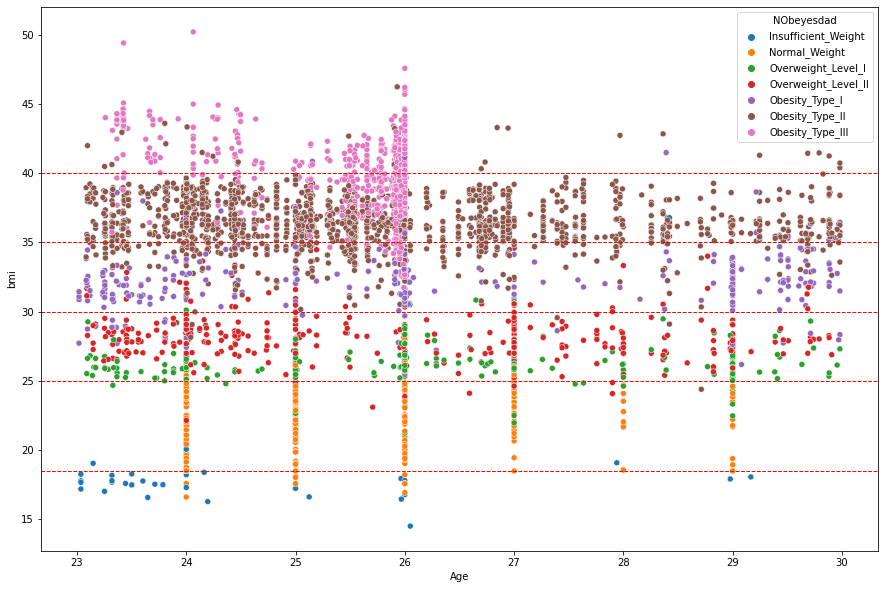

In [100]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df[(df["Age"]>23)&(df["Age"]<30)], x="Age", y="bmi", hue="NObeyesdad")

for bin in bins[1:-1]:
    plt.axhline(y=bin, color = 'red', linestyle ='--', linewidth=1)

- Age가 26세인 경우에, bmi가 40 미만임에도 3단계 비만인 케이스가 많음(세로줄)
- 결측치 처리 등의 이유로 발생한 문제일지, 다른 요인이 작용했을지 알아볼 필요가 있을 듯

<AxesSubplot:xlabel='Weight', ylabel='bmi'>

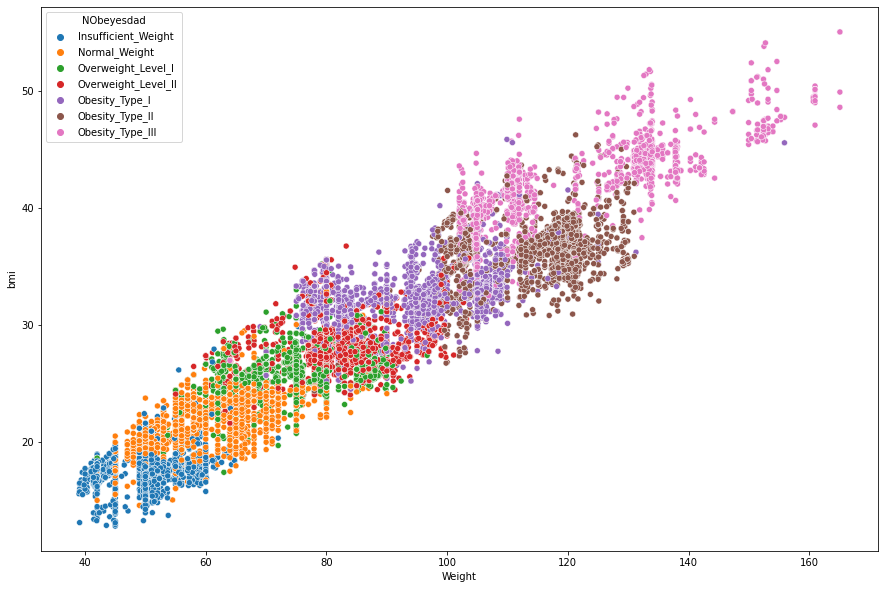

In [43]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="Weight", y="bmi", hue="NObeyesdad")

### bmi_class

In [60]:
bins = [0, 18.5, 25, 30, 35, 40, 60]  # max = 54.99
labels = ["under","normal","over","obesity_1","obesity_2","obesity_3"]

df["bmi_class"] = pd.cut(df["bmi"], right=False, bins=bins, labels=labels)
df[["bmi", "bmi_class"]].head()

,bmi,bmi_class
0,28.259565,over
1,23.422091,normal
2,17.126706,under
3,44.855798,obesity_3
4,25.599151,over


## 각 변수별 target값 확인

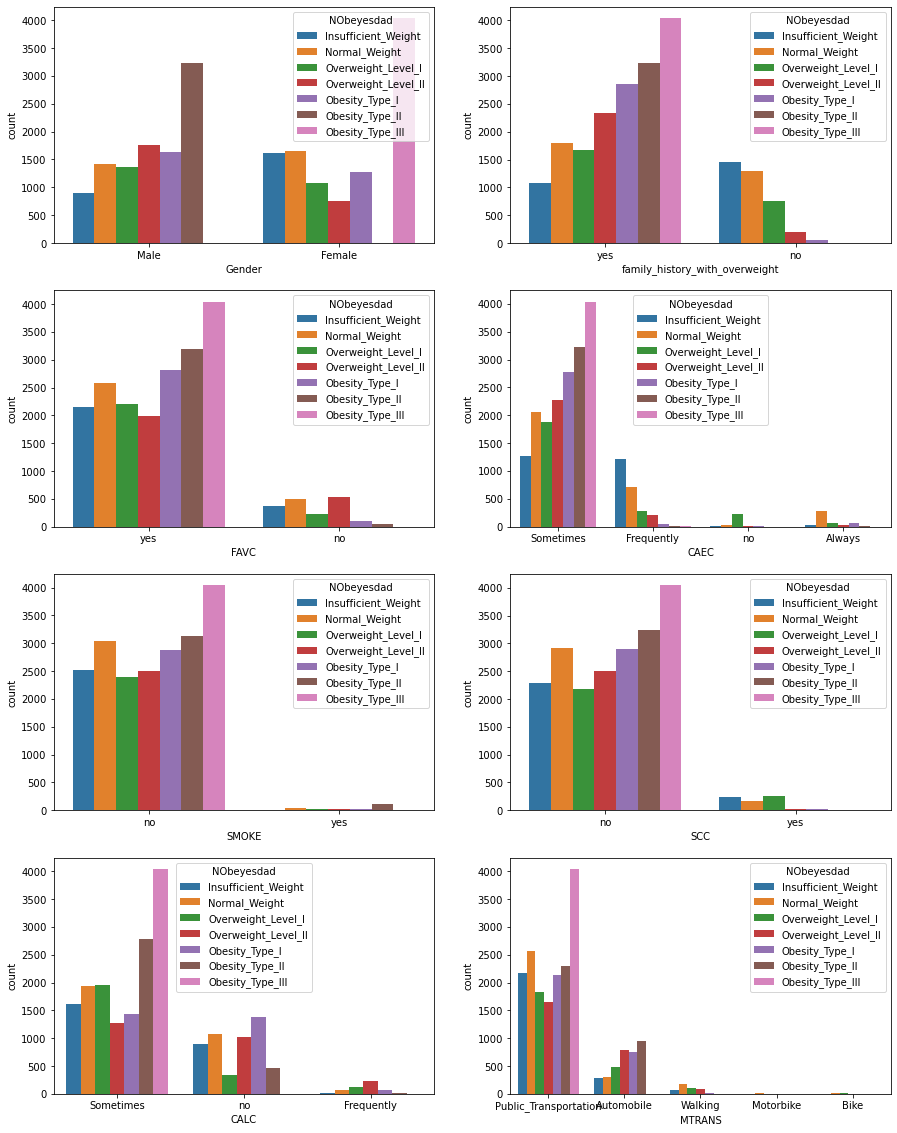

In [105]:
# 범주형 변수
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, col_name in enumerate(cat_list[:-1]):
    sns.countplot(data=df, x=col_name, hue="NObeyesdad", ax=axes[i//2, i%2])

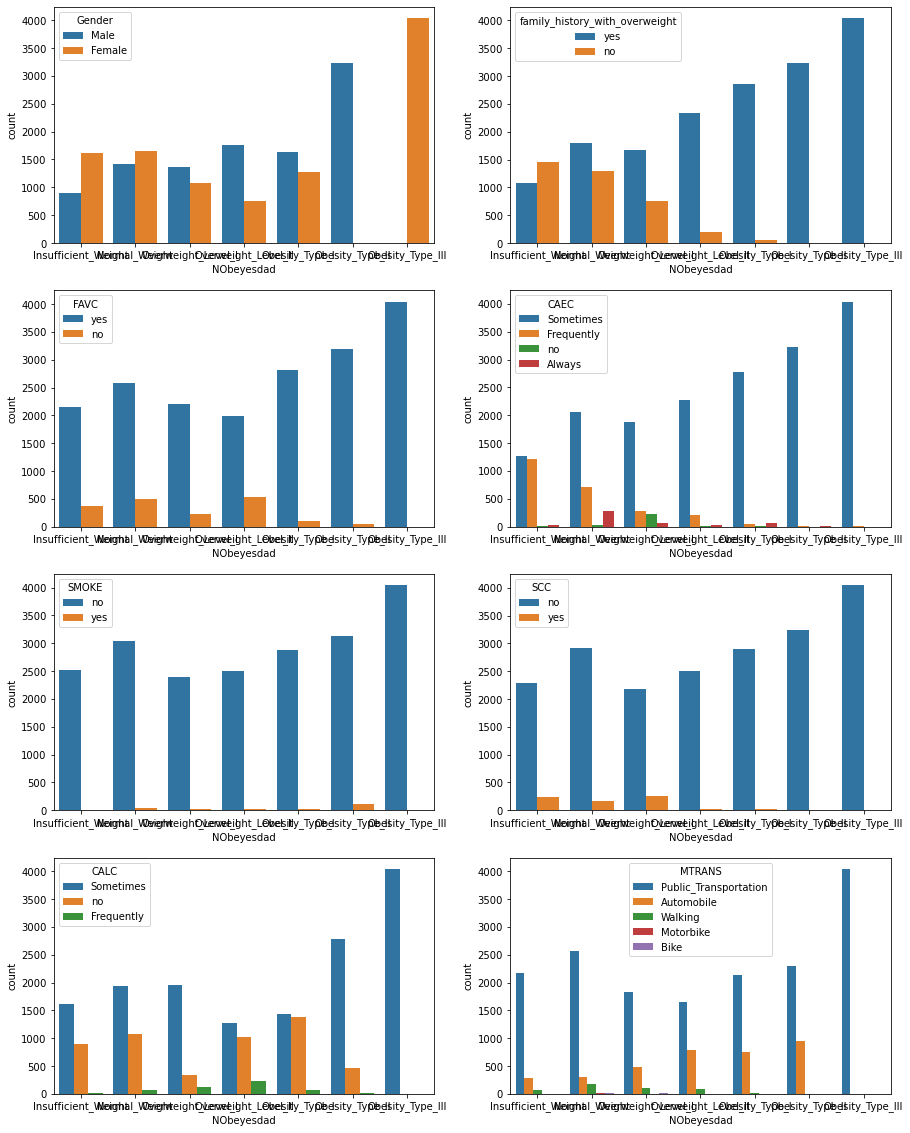

In [167]:
# 범주형 변수
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, col_name in enumerate(cat_list[:-1]):
    sns.countplot(data=df, x="NObeyesdad", hue=col_name, ax=axes[i//2, i%2])

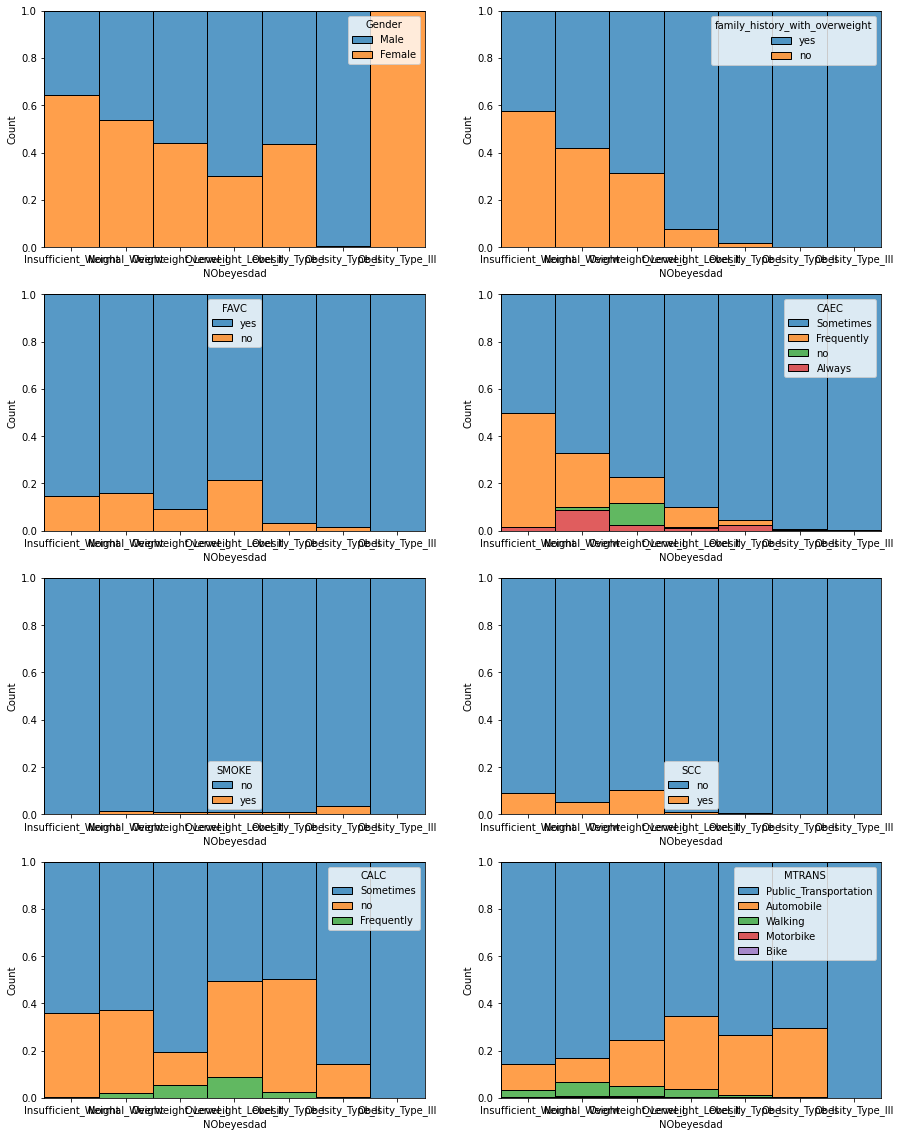

In [149]:
# 범주형 변수
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, col_name in enumerate(cat_list[:-1]):
    sns.histplot(data=df, x="NObeyesdad", hue=col_name, multiple="fill", ax=axes[i//2, i%2])

In [132]:
df["Gender"].value_counts(normalize=True)

Female    0.502071
Male      0.497929
Name: Gender, dtype: float64

## 라벨 인코딩

In [168]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le

LabelEncoder()

In [169]:
cat_list

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [172]:
le_df = pd.DataFrame()

for col in cat_list:
    encoded = le.fit_transform(df[col])
    le_df[col+"_le"] = encoded
le_df

,Gender_le,family_history_with_overweight_le,FAVC_le,CAEC_le,SMOKE_le,SCC_le,CALC_le,MTRANS_le,NObeyesdad_le
0,1,1,1,2,0,0,1,3,6
1,0,1,1,1,0,0,2,0,1
2,0,1,1,2,0,0,2,3,0
3,0,1,1,2,0,0,1,3,4
4,1,1,1,2,0,0,1,3,6
...,...,...,...,...,...,...,...,...,...
20753,1,1,1,2,0,0,1,3,3
20754,1,0,1,1,0,0,1,3,0
20755,1,1,1,2,0,0,2,3,3
20756,1,1,1,2,0,0,2,0,6


## 상관계수

In [150]:
corr = df.corr()
corr

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,bmi
id,1.000000,0.007634,0.012041,0.014020,0.002098,-0.000332,0.007917,0.016719,0.007667,0.011191
Age,0.007634,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154,0.320842
Height,0.012041,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433,0.098126
Weight,0.014020,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471,0.941071
FCVC,0.002098,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843,0.296933
NCP,-0.000332,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459,0.048736
CH2O,0.007917,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654,0.292142
FAF,0.016719,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213,-0.210239
TUE,0.007667,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000,-0.117098
bmi,0.011191,0.320842,0.098126,0.941071,0.296933,0.048736,0.292142,-0.210239,-0.117098,1.000000


<AxesSubplot:>

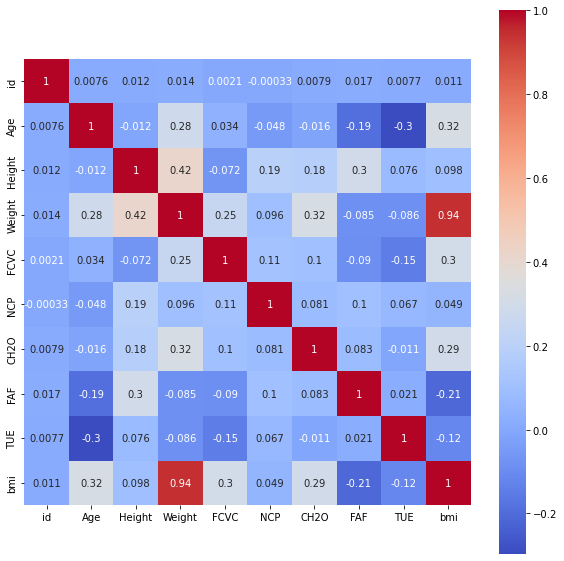

In [152]:
# 히트맵으로 상관계수 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, square=True)
# plt.title('Correlation Matrix of Numeric Features')
# plt.show()

In [ ]:
# Cramer's V



# End